# Winter School 2024 - EDA Tutorial

This notebook highlights an exploratory data analysis using the example of the Titanic data set
(https://www.kaggle.com/competitions/titanic/data).

Authors: Christopher Katins, Mario Sänger, Christopher Lazik, Thomas Kosch
Credits to Patrick Schäfer (HU Berlin)

------------

Contents of the Notebook:

#### Part 1: Data Description and Visualization:

1. Analyzing features and their distribution.
2. Finding relations or trends between features.

#### Part 2: Feature Engineering:

1. Adding features.
2. Removing features.
3. Converting features into suitable form for modeling.

#### Part 3: Predictive Modeling

1. Running a simple classification algorithm.

--------------------

#### Titanic data set

Features:
  - Name: Full name
  - Sex: Sex of the passenger
  - Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
  - Ticket: Ticket number
  - Cabin: Cabin number
  - Survived: Survival (0 = No, 1 = Yes)
  - PClass: Ticket class as a proxy for socioeconomic status (1 = 1st, 2 = 2nd, 3 = 3rd)
  - Age: Passenger age
  - Fare: Passenger fare
  - SibSp: Number of siblings (brother, sister, stepbrother, stepsister)) / spouses (husband, wife) aboard the Titanic
  - Parch: Number of parents (mother, father) / children (daughter, son, stepdaughter, stepson)*

*Some children travelled only with a nanny, therefore parch=0 for them.



# Part 1: Data Description and Visualization
Setup the environment and install the required packages

In [104]:
from pandas import DataFrame
!python -m venv env_eda_titanic

In [105]:
!source env_eda_titanic/bin/activate

In [201]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 293.6 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 261.8 kB/s eta 0:00:0000:0100:01


Import used packages and used classes / functions

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

In [141]:
# Load training data
data = pd.read_csv("data/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Basic Structure

Use .info() to get brief information about the dataframe

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
# Get number of unique values per column
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Null Values and Summary Statistics

In [145]:
# Describe basic statistics of the numerical attributes
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
# Describe basic statistics of the non-numerical attributes
data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Missing Values

Let's check whether there are missing values in any columns

In [147]:
# Checking for total number of null values for each column
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

=> The `Age`, `Cabin` and `Embarked` have null values. we will try to infer them from the data.

In [148]:
# Checking for duplicates in the data set
data.duplicated().any()

False

=> No duplicated rows

### Survival rates

Let's first inspect the survival rates of the passengers

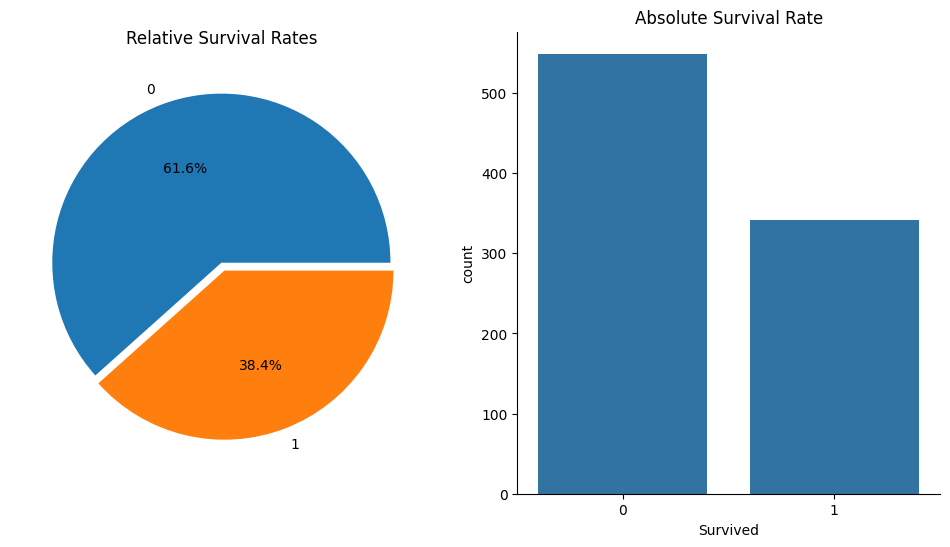

In [149]:
# Create a figure with two sub-plots
f,ax=plt.subplots(1,2,figsize=(12,6))

# Pie plot for relative rates
data["Survived"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Relative Survival Rates')
ax[0].set_ylabel('')

# Bar plot for absolute rates
sns.countplot(data, x="Survived", ax=ax[1])
ax[1].set_title("Absolute Survival Rate")
sns.despine()

**Observation:**
- Out of 891 passengers in training set, only around 350 survived
- That is: 38.4% survived

We will dig down deeper to get better insights and see which features of the passengers increased the chance of survival

# Key Question: What influenced the chance of survival?

### Factor Sex

We will first build a cross tabulation between Sex and Survival Rates.

In [150]:
pd.crosstab(data["Sex"],data["Survived"],margins=True)  \
    .style.background_gradient(cmap='Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


We will next use a histogram to show the relation

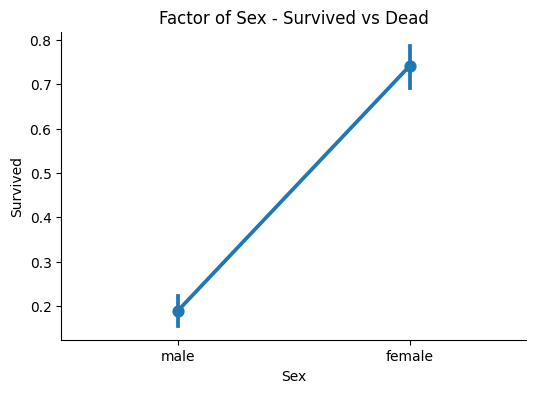

In [152]:
# Plot survival rates per Sex
_,ax=plt.subplots(1,1,figsize=(6,4))
ax = sns.pointplot(data, x='Sex', y='Survived', ax=ax)
ax.set_title('Factor of Sex - Survived vs Dead')
sns.despine()
plt.show()

**Observations:**

=> Concerning female passengers: ~ 3/4 of the passengers survived
=> For male passengers it's inverse: ~ only 1/5 of the passengers survived
=> We can clearly see that female passengers had a much higher rate of survival.

### Factor PClass

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


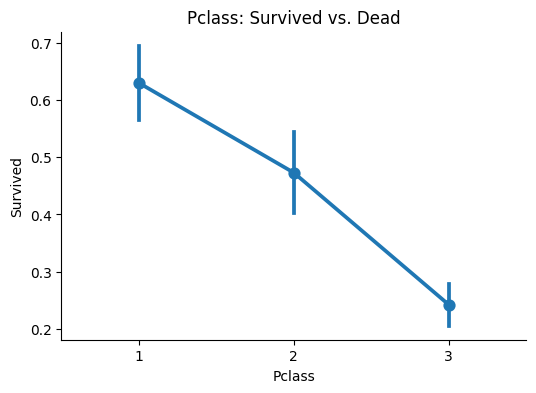

In [153]:
# Build a cross table for pclass and survived
ct = pd.crosstab(data["Pclass"],data["Survived"],margins=True) \
    .style.background_gradient(cmap='Blues')
display(ct)

# Get the table with normalized values
ct = pd.crosstab(data["Pclass"],data["Survived"],margins=True, normalize=True) \
    .style.background_gradient(cmap='Blues')
display(ct)

# Plot the values
_,ax = plt.subplots(1,1,figsize=(6,4))
sns.pointplot(data, x="Pclass", y="Survived", ax=ax)
ax.set_title("Pclass: Survived vs. Dead")
sns.despine()

**Observations:**
=> We can clearly see that passengers of class 1 were given a high priority while rescue.

### Sex AND Pclass

Now let's look on the joint impact of Sex and Pclass

In [154]:
pd.crosstab([data["Sex"],data["Survived"]],data["Pclass"],margins=True) \
    .style.background_gradient(cmap='Blues')

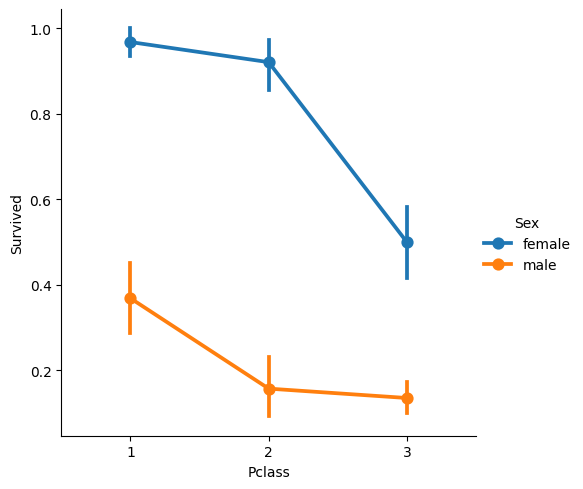

In [155]:
# Visualize the interactions
sns.catplot(data, x="Pclass", y="Survived", hue="Sex", kind="point")
sns.despine()

**Observations:**
=> The chances of survival were highest, if you were female and in the first passenger class.
    

### Age

Let's inspect the age of the passengers ...

In [156]:
print('Oldest Passenger was:',data['Age'].max(),'Years')
print('Youngest Passenger was:',data['Age'].min(),'Years')

Oldest Passenger was: 80.0 Years
Youngest Passenger was: 0.42 Years


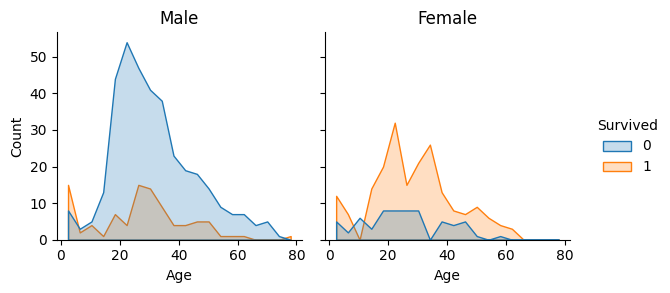

In [158]:
# Plot the distribution of survived passenger per age (and Sex)
fg = sns.displot(data, x="Age", hue="Survived", col="Sex", element="poly", height=3)
fg.axes_dict["male"].set_title("Male")
_ = fg.axes_dict["female"].set_title("Female")

**Observations:**
    
1. Survival rates for passenegers below age 10 is increased
2. Survival chances for passenegers aged 20-50 from Pclass 1 is highest, and even better for women.
3. The Women and Child first policy thus holds true

### Handling Missing Values

#### Filling Age

As we had seen earlier, the Age feature has 177 null values.

The Name feature has a salutation like Mr or Mrs. Thus we may use it to guess the age of respective groups.

In [159]:
data[["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


We are using a Regex for extracting the salutation / initial of the persons. It returns strings that contain A-Z or a-z and are followed by a punctuation "." (dot)

In [161]:
# Try to extract the Initial from the passenger name
data["Initial"] = data["Name"].str.extract('([A-Za-z]+)\.')
data[["Initial"]].head()

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


***Checking Frequency of Initial***

In [162]:
# Plot a cross tabulation
pd.crosstab(data["Initial"],data["Sex"]).T \
    .style.background_gradient(cmap='Blues')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [164]:
# Get the mean average per extracted initial
data.groupby("Initial")[["Age"]].mean()

,Age
Initial,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


**Observations:**
=> There are some misspelled initials like Mlle or Mme that stand for Miss
=> Master can be matched to male children. Miss is less distinct.

In [165]:
# Replace misspelled initials with corrected ones
data["Initial"].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [166]:
data.groupby('Initial')[['Age']].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [167]:
# Filling Missing Ages by Initial averages
data["Age"].fillna(data.groupby("Initial")["Age"].transform("mean"), inplace=True)

In [168]:
data.Age.isnull().any()

False

In [ ]:
# Inspect the survival rates per initial and Pclass
sns.catplot(data, x="Pclass", y="Survived", col="Initial", kind="point", height=2)
sns.despine()

**Observation:**
=> The Women and Child first policy thus holds true

### Embarked

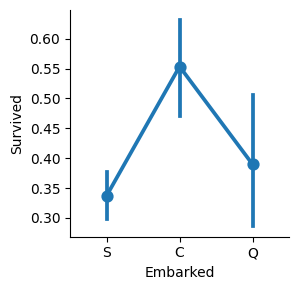

In [169]:
sns.catplot(data, x="Embarked", y="Survived", kind="point", height=3);

**Observations:**
=> The chances for survival for Port C (Cherbourg) is highest around 0.55 while it is lowest for S (Southampton).

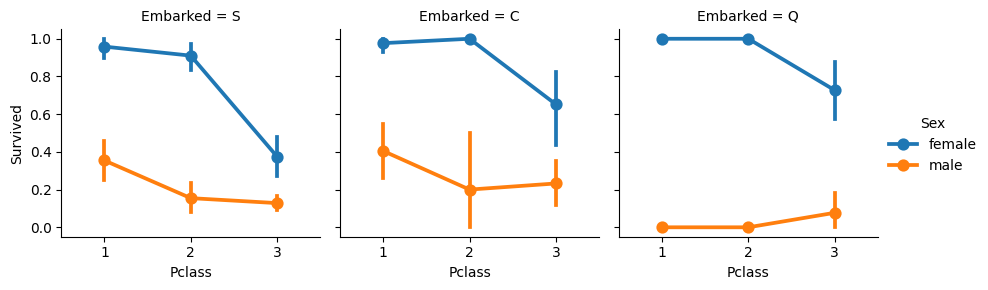

In [171]:
# Let's inspect whether there is a (joint) effect of pclass, survived, sex and embarked
sns.catplot(data, x="Pclass",y="Survived", hue="Sex", col="Embarked", kind="point", height=3);

**Observations:**

- The survival rates are ~1 for women from Pclass 1 and Pclass 2 irrespective of the port
- Port S is worst for Pclass 3
- Port Q is worst for Men

# Filling Emarked NaN

There are two missing values for `Embarked`


In [172]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [173]:
# Let's check which is the port with the highest number of entering passengers
data["Embarked"].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

As we saw that most passengers boarded from Port S, we replace NaN with S.

In [174]:
# Fill embarked with mode value
data["Embarked"].fillna(data["Embarked"].mode().values[0], inplace=True)
data["Embarked"].isnull().any()

False

### SibSip

This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [175]:
# Build cross tabulation
pd.crosstab(data["SibSp"], data["Survived"], normalize=True) \
    .style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,0.446689,0.235690
1,0.108866,0.125701
2,0.016835,0.014590
3,0.013468,0.004489
4,0.016835,0.003367
5,0.005612,0.000000
8,0.007856,0.000000


In [135]:
pd.crosstab(data["SibSp"],data["Pclass"], normalize=True) \
    .style.background_gradient(cmap='Blues')

Pclass,1,2,3
SibSp,,,
0,0.153760,0.134680,0.393939
1,0.079686,0.061728,0.093154
2,0.005612,0.008979,0.016835
3,0.003367,0.001122,0.013468
4,0.000000,0.000000,0.020202
5,0.000000,0.000000,0.005612
8,0.000000,0.000000,0.007856


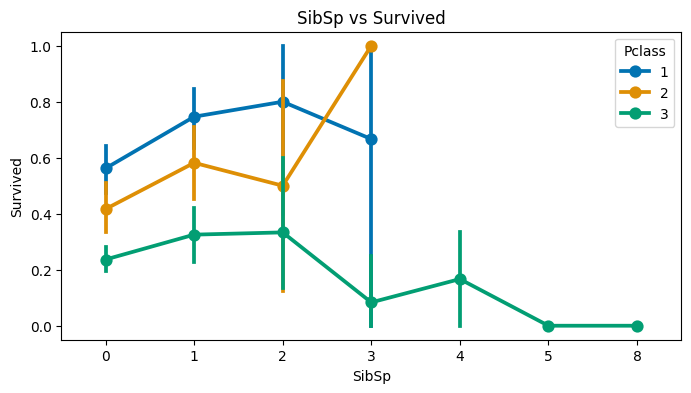

In [181]:
f,ax=plt.subplots(figsize=(8,4))
ax = sns.pointplot(data, x="SibSp", y="Survived", hue="Pclass", palette="colorblind", ax=ax)
_ = ax.set_title("SibSp vs Survived")

**Observations:**
- Plcass 1 and 2 had highest chances of survival
- Families with 3 Members had highest chances of survival
- Families >3 were only in Pclass 3
- Survival for families with >5 members is 0%. 


### Fare

In [183]:
# Inspect min, max and mean fares
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


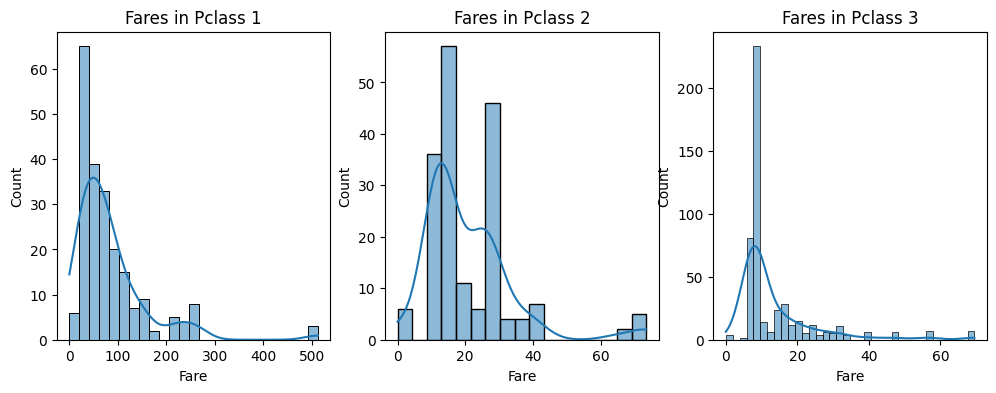

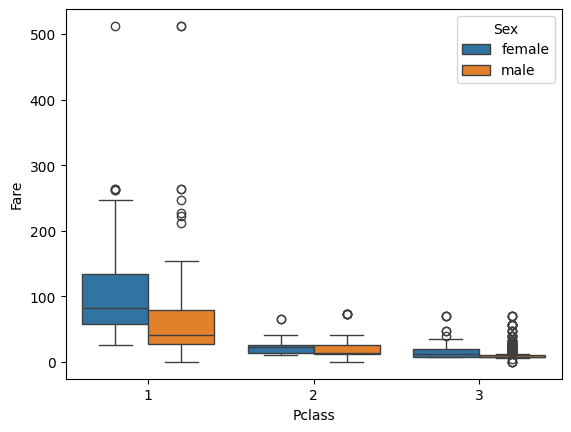

In [184]:
f,ax=plt.subplots(1,3,figsize=(12,4))

# Plot fares histogram per Pclass
# kde=True -> kernel density estimation (KDE, i.e. the application of
# kernel smoothing for probability density estimation
sns.histplot(x=data[data['Pclass']==1].Fare,kde=True,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.histplot(x=data[data['Pclass']==2].Fare,kde=True,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.histplot(x=data[data['Pclass']==3].Fare,kde=True,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

# Create fare box per Sex
sns.boxplot(x="Pclass", y="Fare", hue="Sex", data=data);

**Observation:**
=> There seems to be a large spread in distributions of fares. Some outliers.

### Log transformed Data

Let's see how the distributions look if we log transform the data

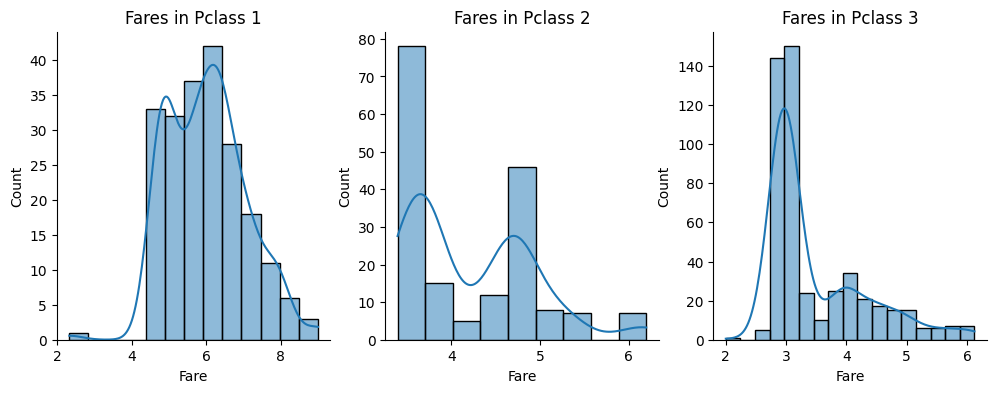

In [188]:
# Function to calculate the log transformation for the
# data of a given Pclass
def get_log_fare(data: DataFrame, pclass: int):
    fare = data[data['Pclass']==pclass]["Fare"]
    return np.log2(fare[fare>0])


# Plot log transformed fares histograms for each PClass
f,ax=plt.subplots(1,3,figsize=(12,4))
sns.histplot(x=get_log_fare(data, 1), kde=True, ax=ax[0])
sns.despine()
ax[0].set_title('Fares in Pclass 1')

sns.histplot(x=get_log_fare(data, 2), kde=True, ax=ax[1])
sns.despine()
ax[1].set_title('Fares in Pclass 2')

sns.histplot(x=get_log_fare(data, 3), kde=True, ax=ax[2])
sns.despine()
_ = ax[2].set_title('Fares in Pclass 3')

**Observation:**
=> Still difficult to interpret the observations due to high variance :-(

## QQ-Plot - Test for Normality

Quantile-quantile plots (QQ-Plots) are a graphical tool used to assess whether a set of data follows a particular probability distribution (e.g. normal distribution). It plots the quantiles of the dataset against the quantiles of the theoretical distribution, allowing users to visually assess how well the data conforms to the expected distribution.

Text(0.5, 0.98, 'Plcass 3')

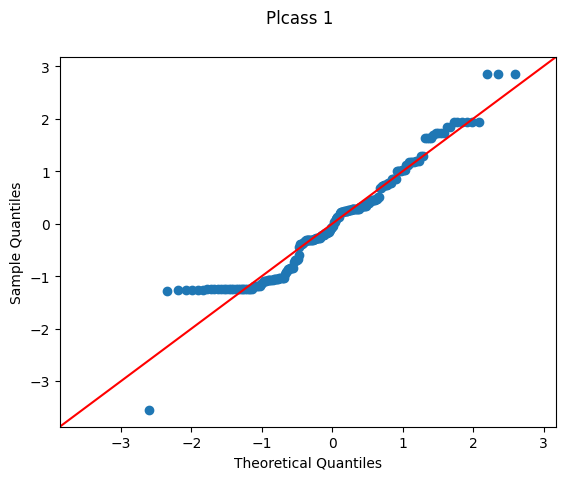

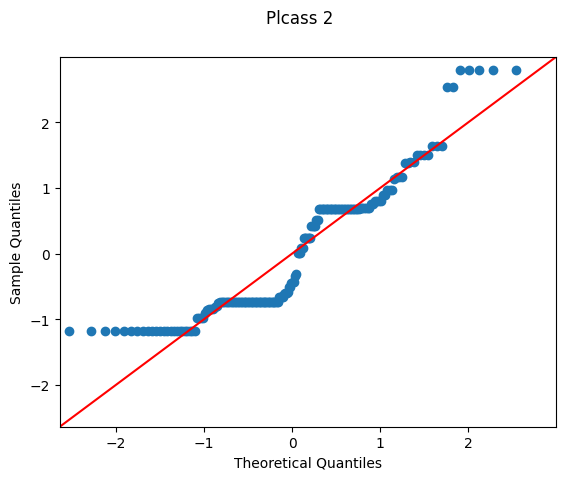

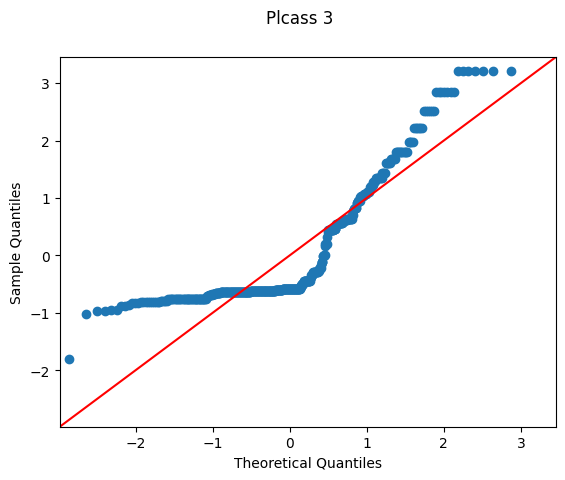

In [191]:
import statsmodels.api as sm
ax = sm.qqplot(get_log_fare(data, 1), fit=True, line="45");
ax.suptitle("Plcass 1")

ax = sm.qqplot(get_log_fare(data, 2), fit=True, line="45");
ax.suptitle("Plcass 2")

ax = sm.qqplot(get_log_fare(data, 3), fit=True, line="45");
ax.suptitle("Plcass 3")

**Observation**: No signs of normal distribution, even for log-transformed data

# Part 2: Feature Engineering

### Family_Size and Alone

One option could be to combine both features which capture relation information of the passengers, i.e., SibSip and Parch. Based on this feature we then can create a feature `alone`, indicating whether a person was travelling alone.

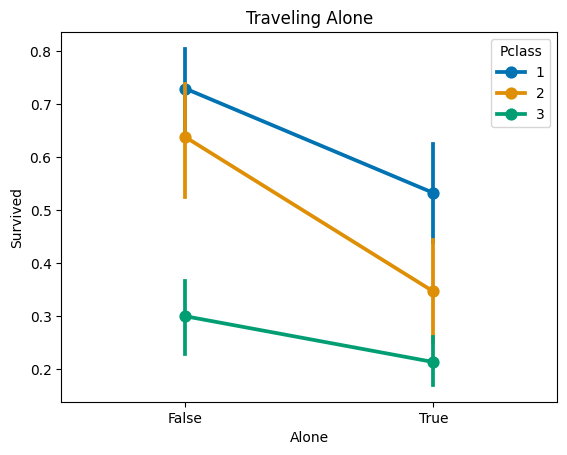

In [194]:
# Build a new feature family size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone'] = data.Family_Size == 0

ax = sns.pointplot(x='Alone',y='Survived', hue="Pclass", palette="colorblind", data=data)
ax.set_title("Traveling Alone");

**Observation** If you were alone then chances for survival is very low. 


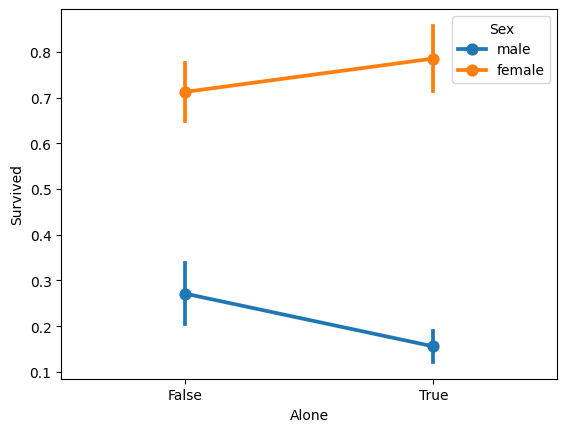

In [195]:
# Plot the Survived and Alone per Sex
ax = sns.pointplot(data, x='Alone',y='Survived', hue='Sex')

Observation: chances of females, who are alone, are higher than those with family.

### Outlier Handling - Binning Fares

In [198]:
# Pandas offers a function qcut - to bin the values of a column into n bins
# Here we bin the fares into 4 categories
data['Fare_Range'] = pd.qcut(data['Fare'], 4, labels=["Small", "Medium", "Large", "Rich"])
data.groupby(['Fare_Range'], observed=False)['Survived'].mean()

Fare_Range
Small     0.197309
Medium    0.303571
Large     0.454955
Rich      0.581081
Name: Survived, dtype: float64

**Observation:** We observe that as the fare increases, the chances of survival increases.


### Encoding Categorical Values

For model building purposes it is often necessary to build one-hot encoded representations of categorical features, e.g. like `Sex`, `Pclass` or `Initial`. In Pandas, the `get_dummies` function can be used to transform each unique value of (categorical) features into a binary feature / column, e.g. for the column `Sex` it will greate two columns named `is_male` and `is_female`.

In [208]:
# Convert Sex, Embarked, Initial, Fare into binary features / columns
data_numerical = pd.get_dummies(data, columns=['Sex'], prefix='is')
data_numerical = pd.get_dummies(data_numerical, columns=['Embarked'], prefix='is')
data_numerical = pd.get_dummies(data_numerical, columns=['Initial'], prefix='is')
data_numerical = pd.get_dummies(data_numerical, columns=['Fare_Range'], prefix='is')

data_numerical

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,is_S,is_Master,is_Miss,is_Mr,is_Mrs,is_Other,is_Small,is_Medium,is_Large,is_Rich
0,1,0,3,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.2500,NaN,...,True,False,False,True,False,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.2833,C85,...,False,False,False,False,True,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.9250,NaN,...,True,False,True,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.1000,C123,...,True,False,False,False,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.00,0,0,373450,8.0500,NaN,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00,0,0,211536,13.0000,NaN,...,True,False,False,False,False,True,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.00,0,0,112053,30.0000,B42,...,True,False,True,False,False,False,False,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.86,1,2,W./C. 6607,23.4500,NaN,...,True,False,True,False,False,False,False,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.00,0,0,111369,30.0000,C148,...,False,False,False,True,False,False,False,False,True,False


# Correlation Between The Numerical Features

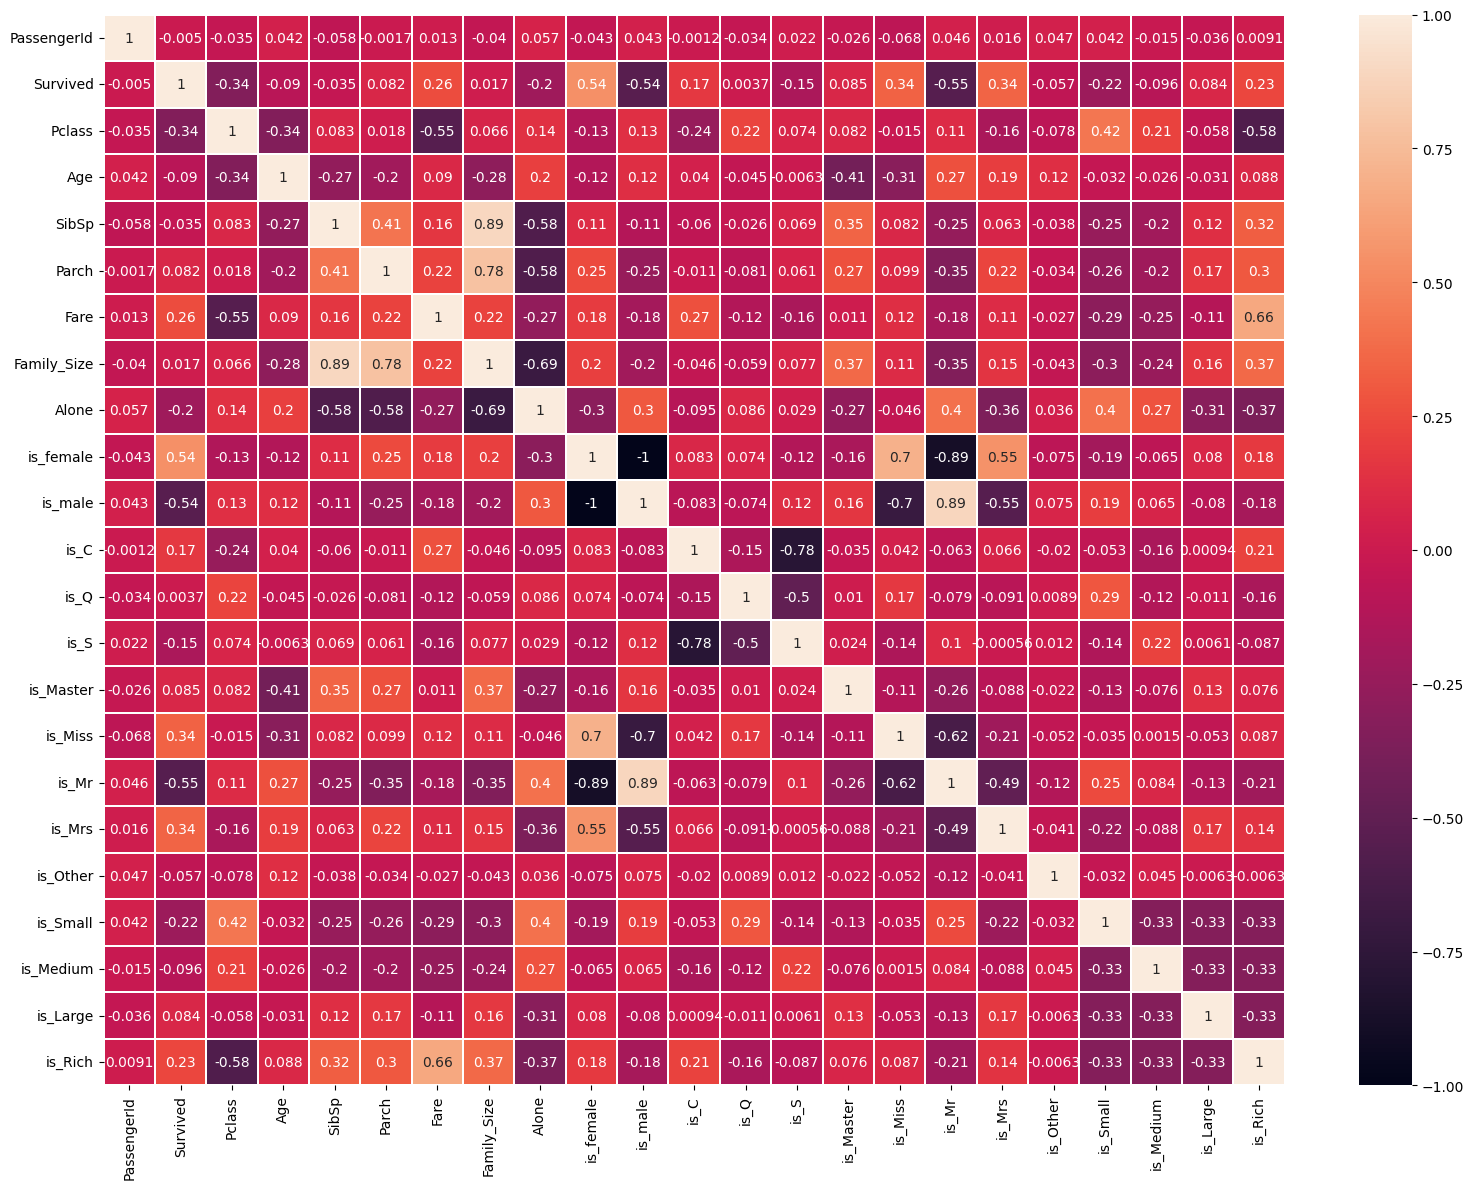

In [207]:
# Plot correlation
_, ax = plt.subplots(figsize=(16,12))
sns.heatmap(data_numerical.corr(numeric_only=True), annot=True, linewidths=0.2, ax=ax)
plt.tight_layout()
plt.show()

There is high correlation between `survived` and `Pclass`, `Fare`, `is_female`, `is_male` `is_S`, `is_C`, `is_Mr`, `is_Mrs`, `is_Miss`, `alone`, `is_rich`

# Observations in a Nutshell for all features:

- Sex: 
    - The chance of survival for women is high as compared to men
- Pclass: 
    - Fares varied significantly with few passengers (<1%) paying as high as $512
    - The more you pay, the better chances of survival
    - The survival rate for Pclass3 is very low
- Age: 
    - Children between 5-10 years do have a high chance of survival
- Embarked: 
    - The chances of survival at C and S were high for lower passenger classes
- Parch+SibSp: 
    - Having a small family  gives a greater chance of than traveling alone (as male) or having a large family travelling with you
    - Females travel best alone

# Part 3: Predictive Modeling

- We have gained insights from the EDA 
- Using this insights, we cannot accurately predict whether a passenger will survive or not
- So we may use a classification algorithm to predict whether the passenger will survive


In [206]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

train_y = data_numerical['Survived']
train_X = data_numerical.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])

# Train Regression model
clf = make_pipeline(StandardScaler(), 
                    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))).fit(train_X, train_y)
score = clf.score(train_X, train_y)

print ("Accuracy of Model: ", score)

Accuracy of Model:  0.8327721661054994
